# Team DatenWelle

## Keywords to timeseries

In [257]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os.path as op
from datetime import datetime, timedelta
from matplotlib.dates import date2num
from collections import Counter

In [2]:
# Opening JSON file
f = open('../data/raw/CMS_2010_to_June_2022_ENGLISH.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)
df = pd.DataFrame.from_dict(data)

In [3]:
df = df.sort_values(by= 'lastModifiedDate')
df = df.reset_index()

### Keyword exploration - Angela Merkel

In [4]:
# Make a new df with only articles that have keyword: Angela Merkel
not_angela_indices = []
for i, row in enumerate(df['keywordStrings']):
    if 'Angela Merkel' not in row:
        not_angela_indices.append(i)

df_angela = df.drop(not_angela_indices)


In [6]:
df_angela.lastModifiedDate.values

array(['2010-01-01T06:39:00.000Z', '2010-01-17T20:12:16.000Z',
       '2010-01-22T17:10:00.000Z', ..., '2022-06-09T16:51:14.646Z',
       '2022-06-17T10:34:33.577Z', '2022-06-29T17:49:53.740Z'],
      dtype=object)

In [7]:
df_angela['date_day'] = df_angela.lastModifiedDate.apply(lambda x: x[:10] if x is not None else x)
df_angela['date_month'] = df_angela.lastModifiedDate.apply(lambda x: x[:7] if x is not None else x)

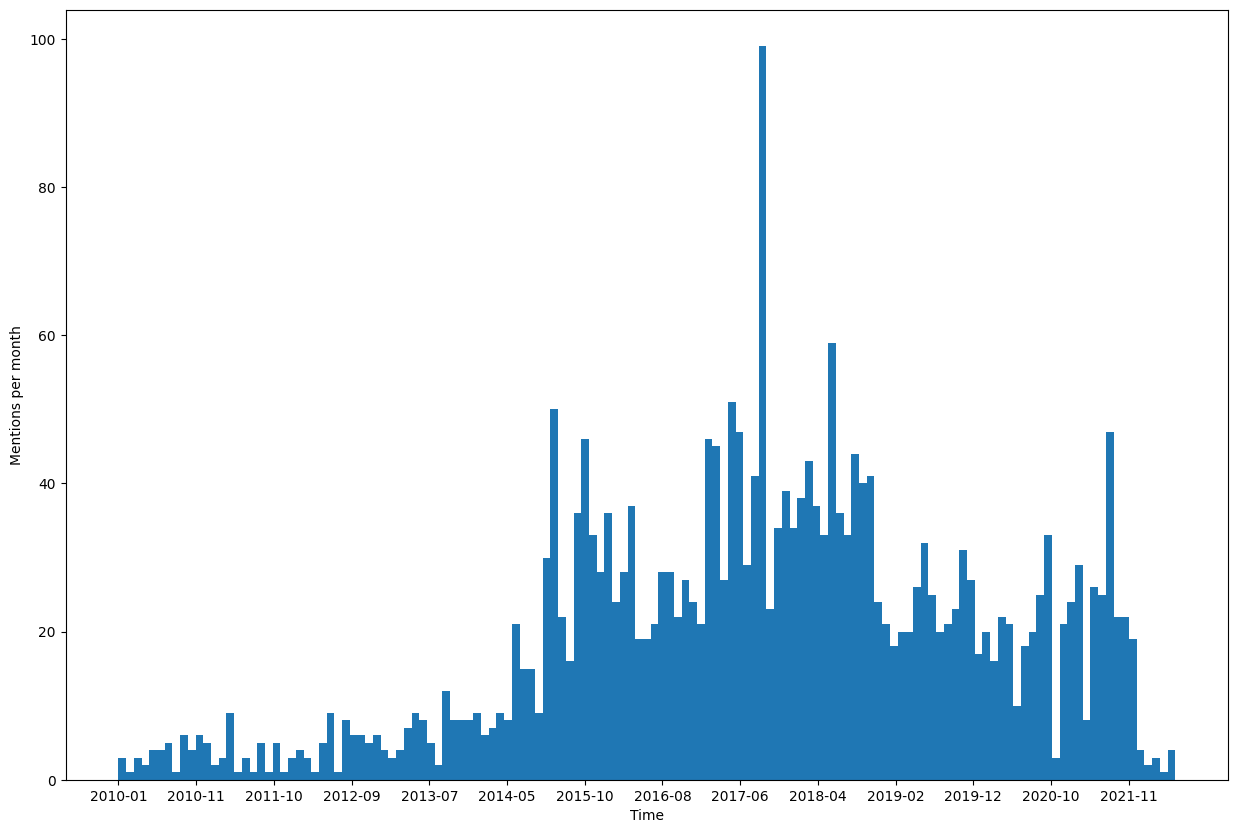

In [10]:
output_dir = '../reports/figures'
fig,ax = plt.subplots(figsize = (15,10))
ax.hist(df_angela.date_month, bins =137)
ax.set_xticks(df_angela.date_month.unique()[::10])
ax.set_xlabel('Time')
ax.set_ylabel('Mentions per month')
fig.savefig(op.join(output_dir,'Angela_Merkel_and_DW_a_love_story.pdf'))
plt.show()

# Extract different time ranges

In [151]:
# Convert to timestamp format
df_angela['date_format_str'] = df_angela.lastModifiedDate.apply(lambda x: datetime.fromisoformat(x[:-1]).strftime('%Y-%m-%d %H:%M:%S'))
df_angela['timestamp_format'] = df_angela.lastModifiedDate.apply(lambda x: datetime.fromisoformat(x[:-1]))

In [300]:
# TODO: automate better the start and end date
start =  df_angela['datetime_format'].iloc[0].to_pydatetime() # first element - convert timestamp to datetime
end = df_angela['datetime_format'].iloc[-1].to_pydatetime() # last element
one_day = timedelta(days = 1)  

date_list = df_angela['datetime_format']

In [ ]:
not_in_df = list(set(all_year_months) - set(df_angela['year_months'].tolist()))

In [388]:
# Write date as year+week
df_angela['year_week'] = df_angela.datetime_format.apply(
lambda x: int(str(x.isocalendar()[0]) + str(x.isocalendar()[1])) if len(str(x.isocalendar()[1])) > 1 else \
        int(str(x.isocalendar()[0]) + '0' + str(x.isocalendar()[1])))

# Count articles per week
yearweek_counts = dict(Counter(df_angela['year_week'].tolist()))

# Compute all year weeks from 2009 to 2022
all_year_weeks = [year*100+week for week in range(1, 54) for year in range(2009, 2023)]
not_in_df = list(set(all_year_weeks) - set(df_angela['year_week'].tolist()))

# Add weeks that are not in table (and set to 0 articles)
for key_ in not_in_df:
    yearweek_counts[key_] = 0

# Cleaning and sort by date
df_yearweek_counts = pd.DataFrame.from_dict(yearweek_counts, orient='index', columns=['val'])
df_yearweek_counts['year_week'] = df_yearweek_counts.index
df_yearweek_counts.sort_values(by='year_week', inplace=True)
df_yearweek_counts = df_yearweek_counts.reset_index()
df_yearweek_counts.drop('index', axis=1, inplace=True)

# Convert to strings to not have empty bits on x-axis
df_yearweek_counts['year_week'] = df_yearweek_counts.year_week.apply(lambda x: str(x))

df_yearweek_counts

,val,year_week
0,0,200901
1,0,200902
2,0,200903
3,0,200904
4,0,200905
...,...,...
737,0,202249
738,0,202250
739,0,202251
740,0,202252


In [405]:
# TODO: automate this
df_yearweek_counts_smaller = df_yearweek_counts.iloc[52:-27] # drop the 50 first rows and the last 27 because = 0
df_yearweek_counts_smaller

,val,year_week
52,1,200953
53,0,201001
54,1,201002
55,1,201003
56,0,201004
...,...,...
710,0,202222
711,2,202223
712,1,202224
713,0,202225


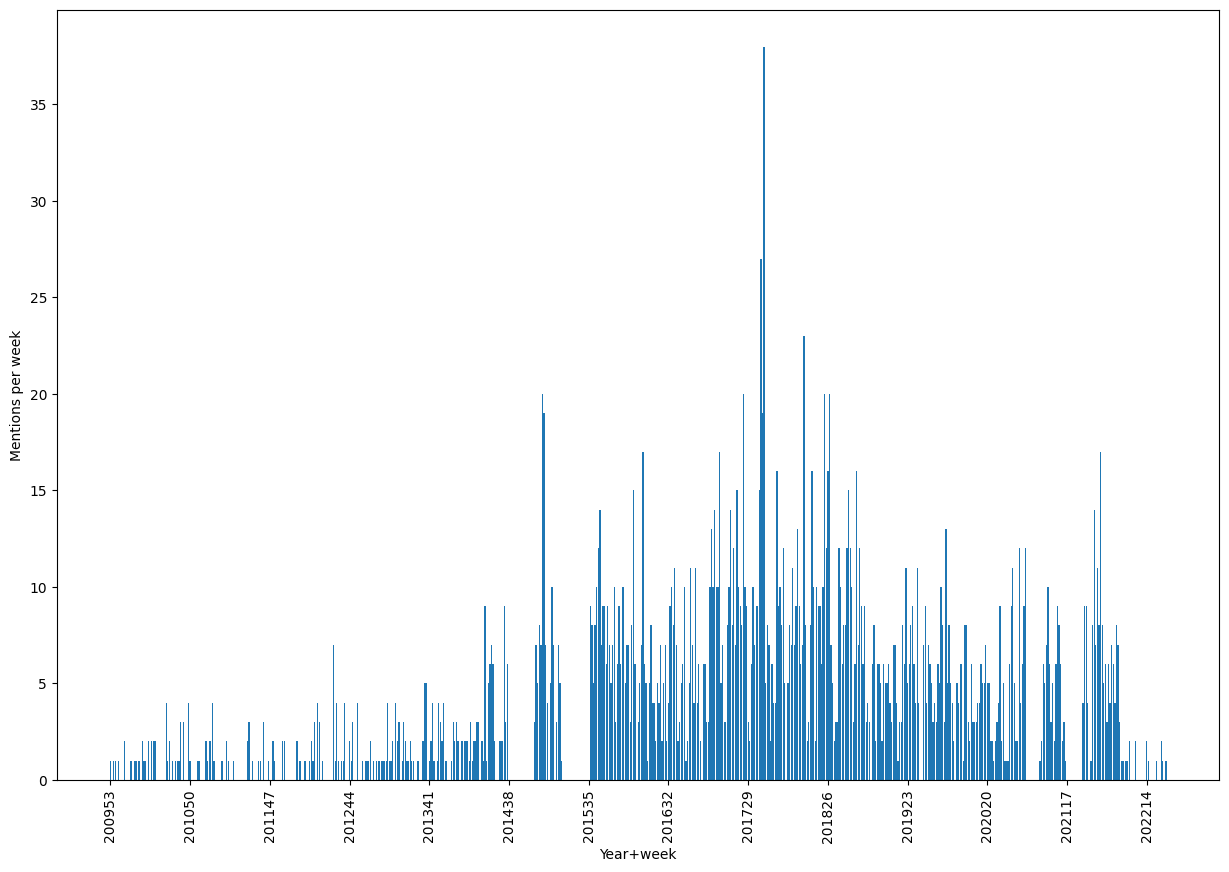

In [407]:
fig,ax = plt.subplots(figsize = (15,10))

ax.bar(df_yearweek_counts_smaller['year_week'], df_yearweek_counts_smaller['val']) 
ax.set_xlabel('Year+week')
ax.set_ylabel('Mentions per week')
ax.xaxis.set_major_locator(plt.MaxNLocator(18)) # only show a certain number of xticks

plt.xticks(rotation=90)
plt.show()